In [1]:
# Data information:
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Data source
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

In [2]:
### import libraries

# for DL modeling
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats


In [3]:
# import the data
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']


# data contain some ?'s; replace with NaN and drop those rows
data = data.replace('?', np.nan).dropna()

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
col_zscore = data.keys()
col_zscore = col_zscore.drop(['sex','fbs','exang','DISEASE'])
col_zscore

for c in col_zscore:
  d = pd.to_numeric(data[c])
  data[c] = (d - d.mean())/d.std(ddof=1)

In [6]:
data['DISEASE'][data['DISEASE']>0] = 1

C:\Users\Derrick\AppData\Local\Temp\ipykernel_17004\1185639727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEASE'][data['DISEASE']>0] = 1


In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,0.934603,1.0,-2.236854,0.749116,-0.275978,1.0,1.008496,0.017465,0.0,1.067164,2.260330,-0.720760,0.654772,0
1,1.376605,1.0,0.872408,1.593577,0.743301,0.0,1.008496,-1.813274,1.0,0.381130,0.642696,2.474249,-0.892713,1
2,1.376605,1.0,0.872408,-0.658320,-0.352904,0.0,1.008496,-0.897904,1.0,1.324427,0.642696,1.409246,1.170601,1
3,-1.938409,1.0,-0.164013,-0.095345,0.050961,0.0,-1.001728,1.630258,0.0,2.096215,2.260330,-0.720760,-0.892713,0
4,-1.496407,0.0,-1.200433,-0.095345,-0.833696,0.0,1.008496,0.976423,0.0,0.295376,-0.974938,-0.720760,-0.892713,0


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
count,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,297.000000
mean,-1.375630e-16,0.676768,-5.457662e-17,4.994135e-16,-1.809252e-16,0.144781,8.373399e-17,4.904420e-16,0.326599,-5.980999e-17,1.196200e-17,-3.588600e-17,-1.674680e-16,0.461279
std,1.000000e+00,0.468500,1.000000e+00,1.000000e+00,1.000000e+00,0.352474,1.000000e+00,1.000000e+00,0.469761,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499340
min,-2.822413e+00,0.000000,-2.236854e+00,-2.122052e+00,-2.333766e+00,0.000000,-1.001728e+00,-3.426067e+00,0.000000,-9.051839e-01,-9.749377e-01,-7.207596e-01,-8.927134e-01,0.000000
25%,-7.229037e-01,0.000000,-1.640127e-01,-6.583195e-01,-6.990742e-01,0.000000,-1.001728e+00,-7.235482e-01,0.000000,-9.051839e-01,-9.749377e-01,-7.207596e-01,-8.927134e-01,0.000000
50%,1.611000e-01,1.000000,-1.640127e-01,-9.534545e-02,-8.366097e-02,0.000000,3.384216e-03,1.482320e-01,0.000000,-2.191498e-01,6.426964e-01,-7.207596e-01,-8.927134e-01,0.000000
75%,7.136023e-01,1.000000,8.724078e-01,4.676287e-01,5.509839e-01,0.000000,1.008496e+00,7.148891e-01,1.000000,4.668843e-01,6.426964e-01,3.442434e-01,1.170601e+00,1.000000
max,2.481610e+00,1.000000,8.724078e-01,3.845473e+00,6.089703e+00,1.000000,1.008496e+00,2.284094e+00,1.000000,4.411580e+00,2.260330e+00,2.474249e+00,1.170601e+00,1.000000


In [9]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[data.keys().drop('DISEASE')].values ).float()
labels = torch.tensor( data['DISEASE'].values ).float()

print( dataT.shape )
print( labels.shape )

# we'll actually need the labels to be a "matrix"
labels = labels[:,None]
print( labels.shape )

torch.Size([297, 13])
torch.Size([297])
torch.Size([297, 1])


In [10]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size=50)

# then convert them into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data  = TensorDataset(test_data, test_labels)

# finally, translate into dataloader objects
batch_size    = 20
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [11]:
class HeartClassModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(13,32)
        self.fc1 = nn.Linear(32,64)
        self.fc2 = nn.Linear(64,10)
        self.output = nn.Linear(10,1)
    
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.output(x)

In [18]:
model = HeartClassModel()
optimizer = torch.optim.Adam(model.parameters(), lr=.00005)
loss_fun = nn.BCEWithLogitsLoss()

epochs = 200

train_loss = torch.zeros(epochs)
test_loss= torch.zeros(epochs)
train_acc= torch.zeros(epochs)
test_acc= torch.zeros(epochs)

for i in range(epochs):
    batch_loss = []
    for X, y in train_loader:
        y_hat = model(X)
        loss = loss_fun(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss.append(loss.item())

        predictions = (torch.sigmoid(y_hat)>.5).float()
        train_acc[i] = 100 * torch.mean((predictions==y).float())

    train_loss[i] = np.mean(batch_loss)

    X, y = next(iter(test_loader))
    y_hat = model(X)

    loss = loss_fun(y_hat, y)
    test_loss[i] = loss.item()

    predictions = (torch.sigmoid(y_hat)>.5).float()
    test_acc[i] = 100 * torch.mean((predictions==y).float())


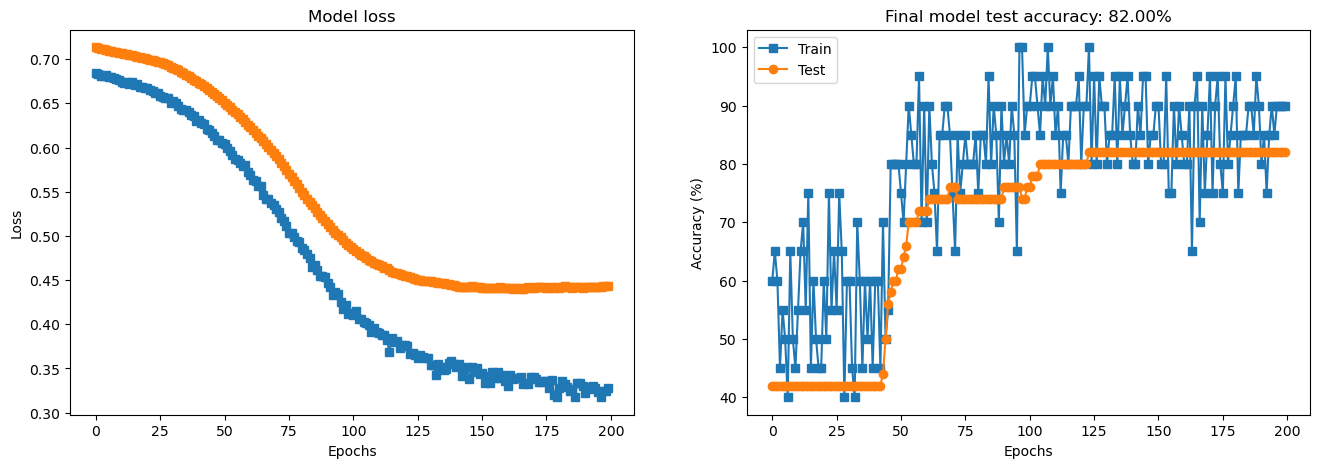

In [19]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(train_loss,'s-',label='Train')
ax[0].plot(test_loss,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(train_acc,'s-',label='Train')
ax[1].plot(test_acc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {test_acc[-1]:.2f}%')
ax[1].legend()

plt.show()